# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

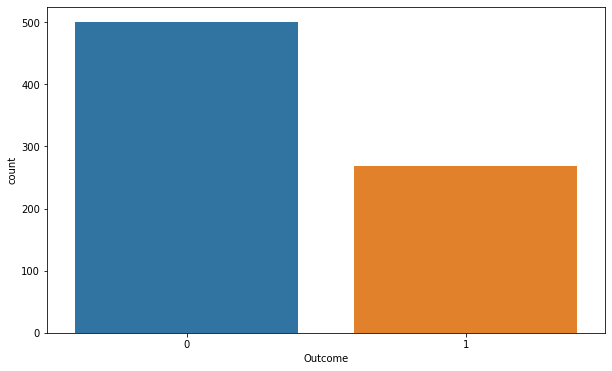

In [8]:
sns.countplot(df.Outcome);

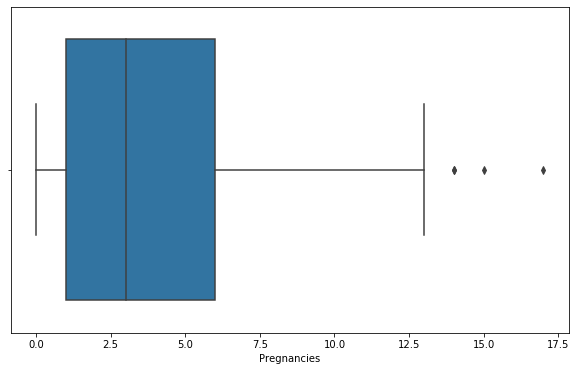

In [9]:
sns.boxplot(df.Pregnancies);

In [10]:
#df=df[df.Pregnancies<13]

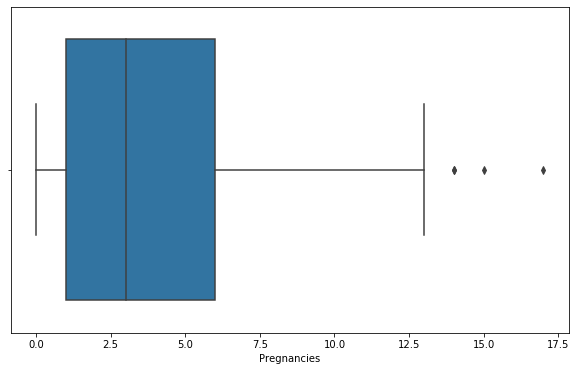

In [11]:
sns.boxplot(df.Pregnancies);

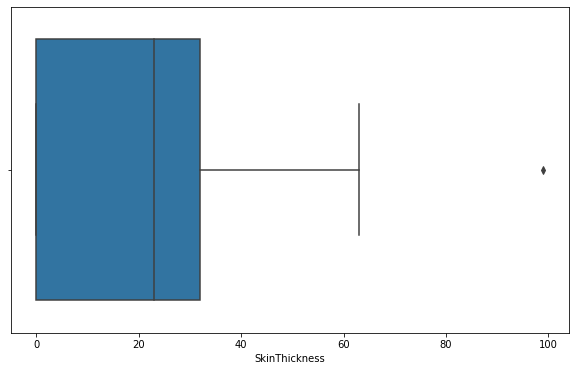

In [12]:
sns.boxplot(df.SkinThickness);

In [13]:
df=df[df.SkinThickness<70]

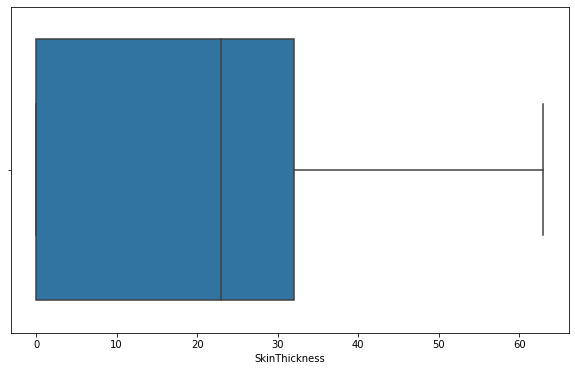

In [14]:
sns.boxplot(df.SkinThickness);

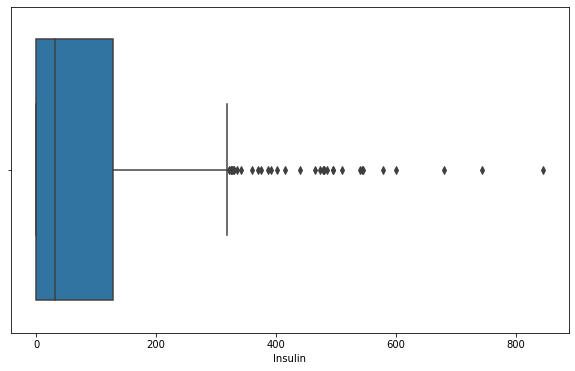

In [15]:
sns.boxplot(df.Insulin);

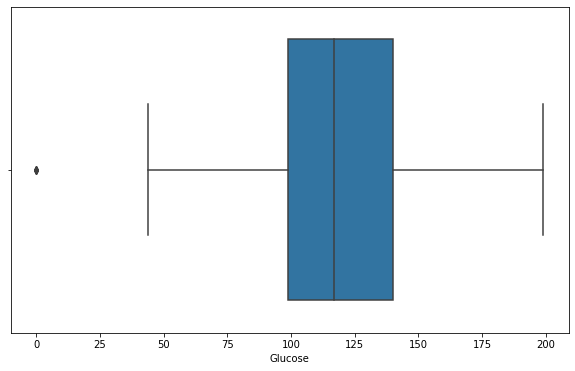

In [16]:
sns.boxplot(df.Glucose);

In [17]:
df=df[df.Glucose>0]

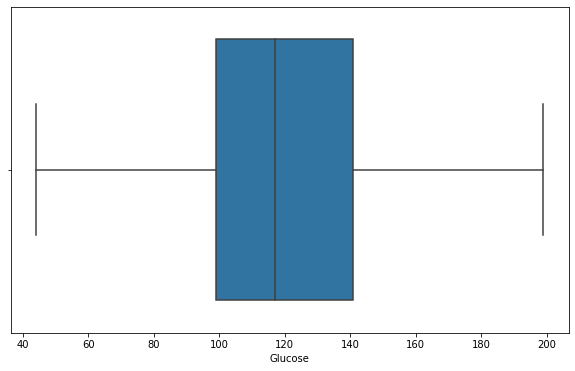

In [18]:
sns.boxplot(df.Glucose);

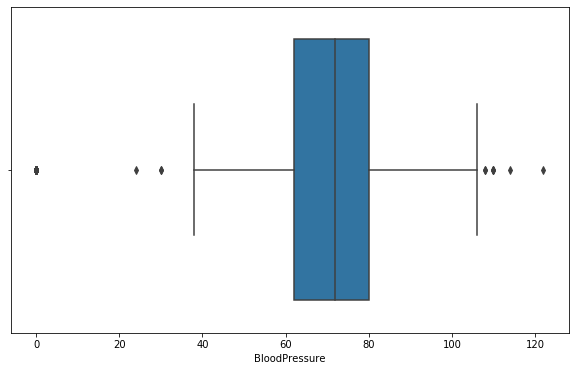

In [19]:
sns.boxplot(df.BloodPressure);

In [20]:
df=df[df.BloodPressure>35]

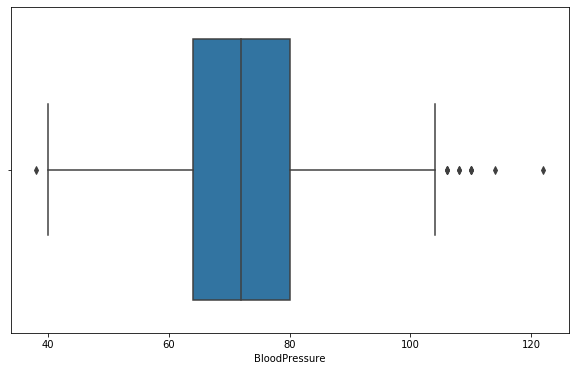

In [21]:
sns.boxplot(df.BloodPressure);

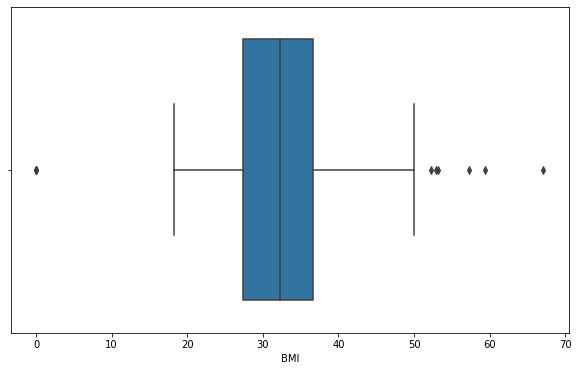

In [22]:
sns.boxplot(df.BMI);

In [23]:
df=df[df.BMI>0]

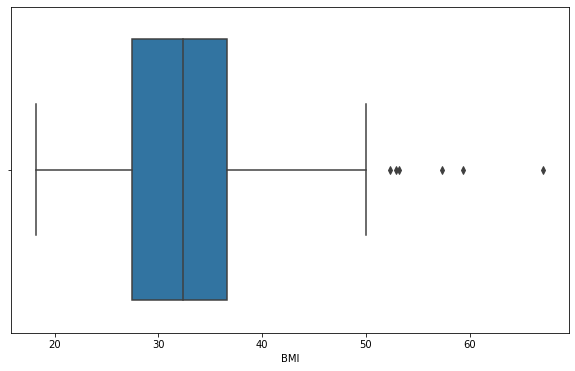

In [24]:
sns.boxplot(df.BMI);

In [25]:
df.shape

(720, 9)

In [26]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

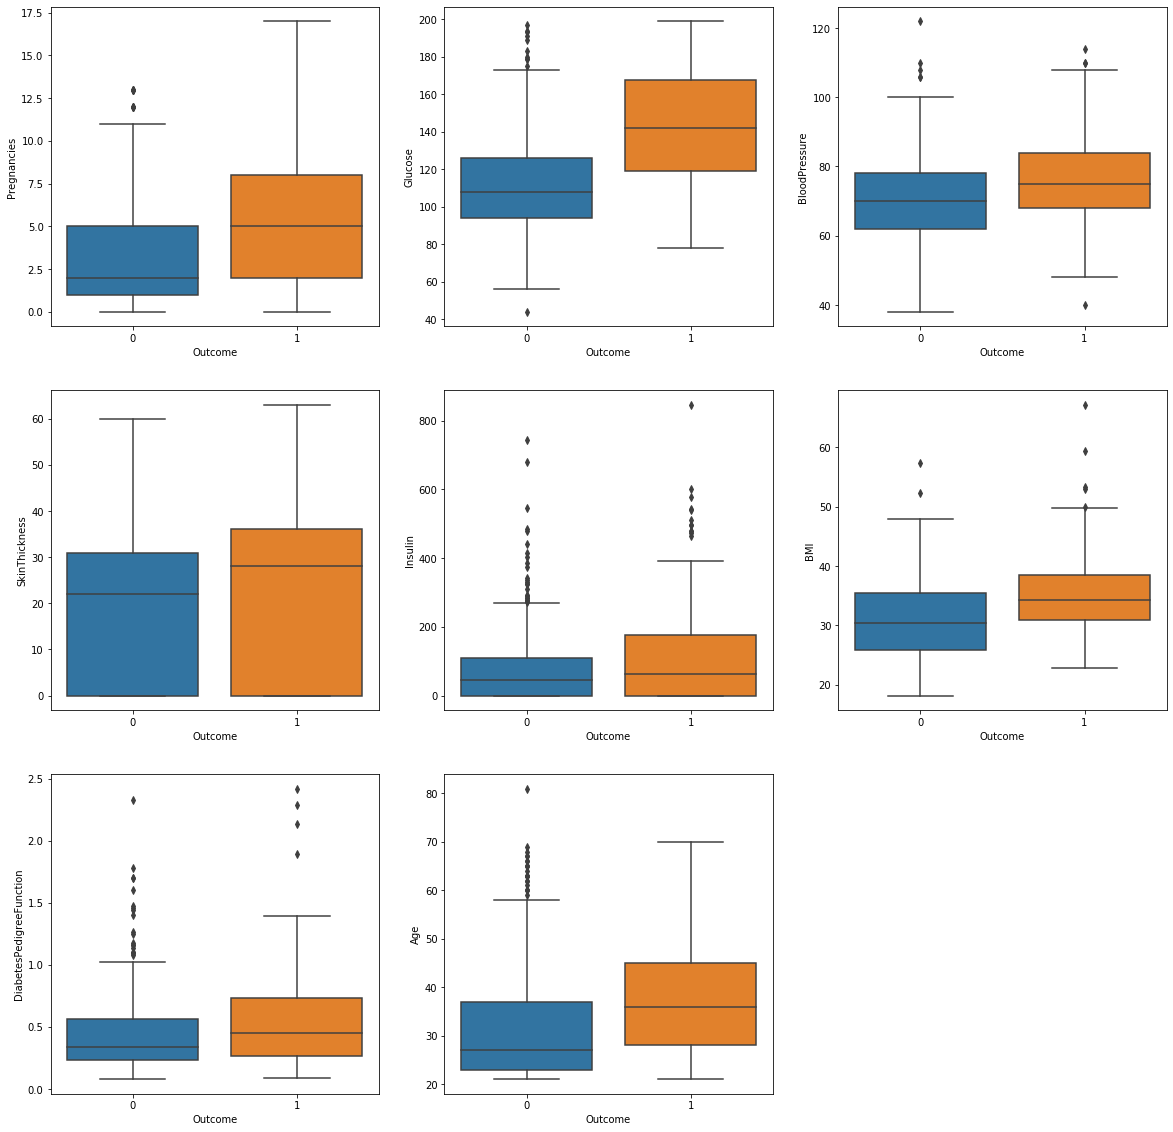

In [27]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

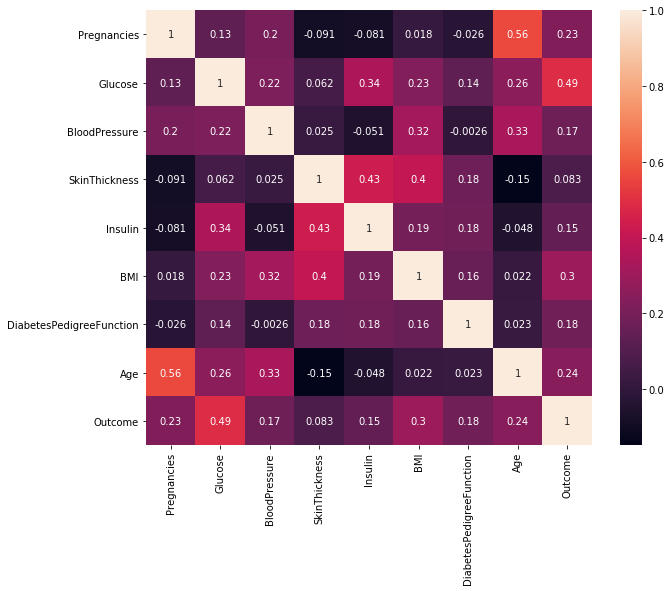

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

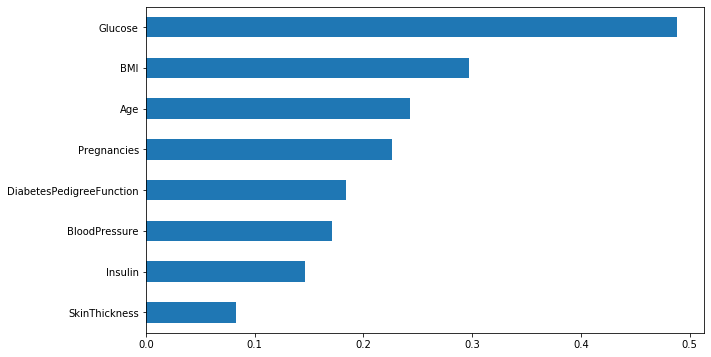

In [29]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh();

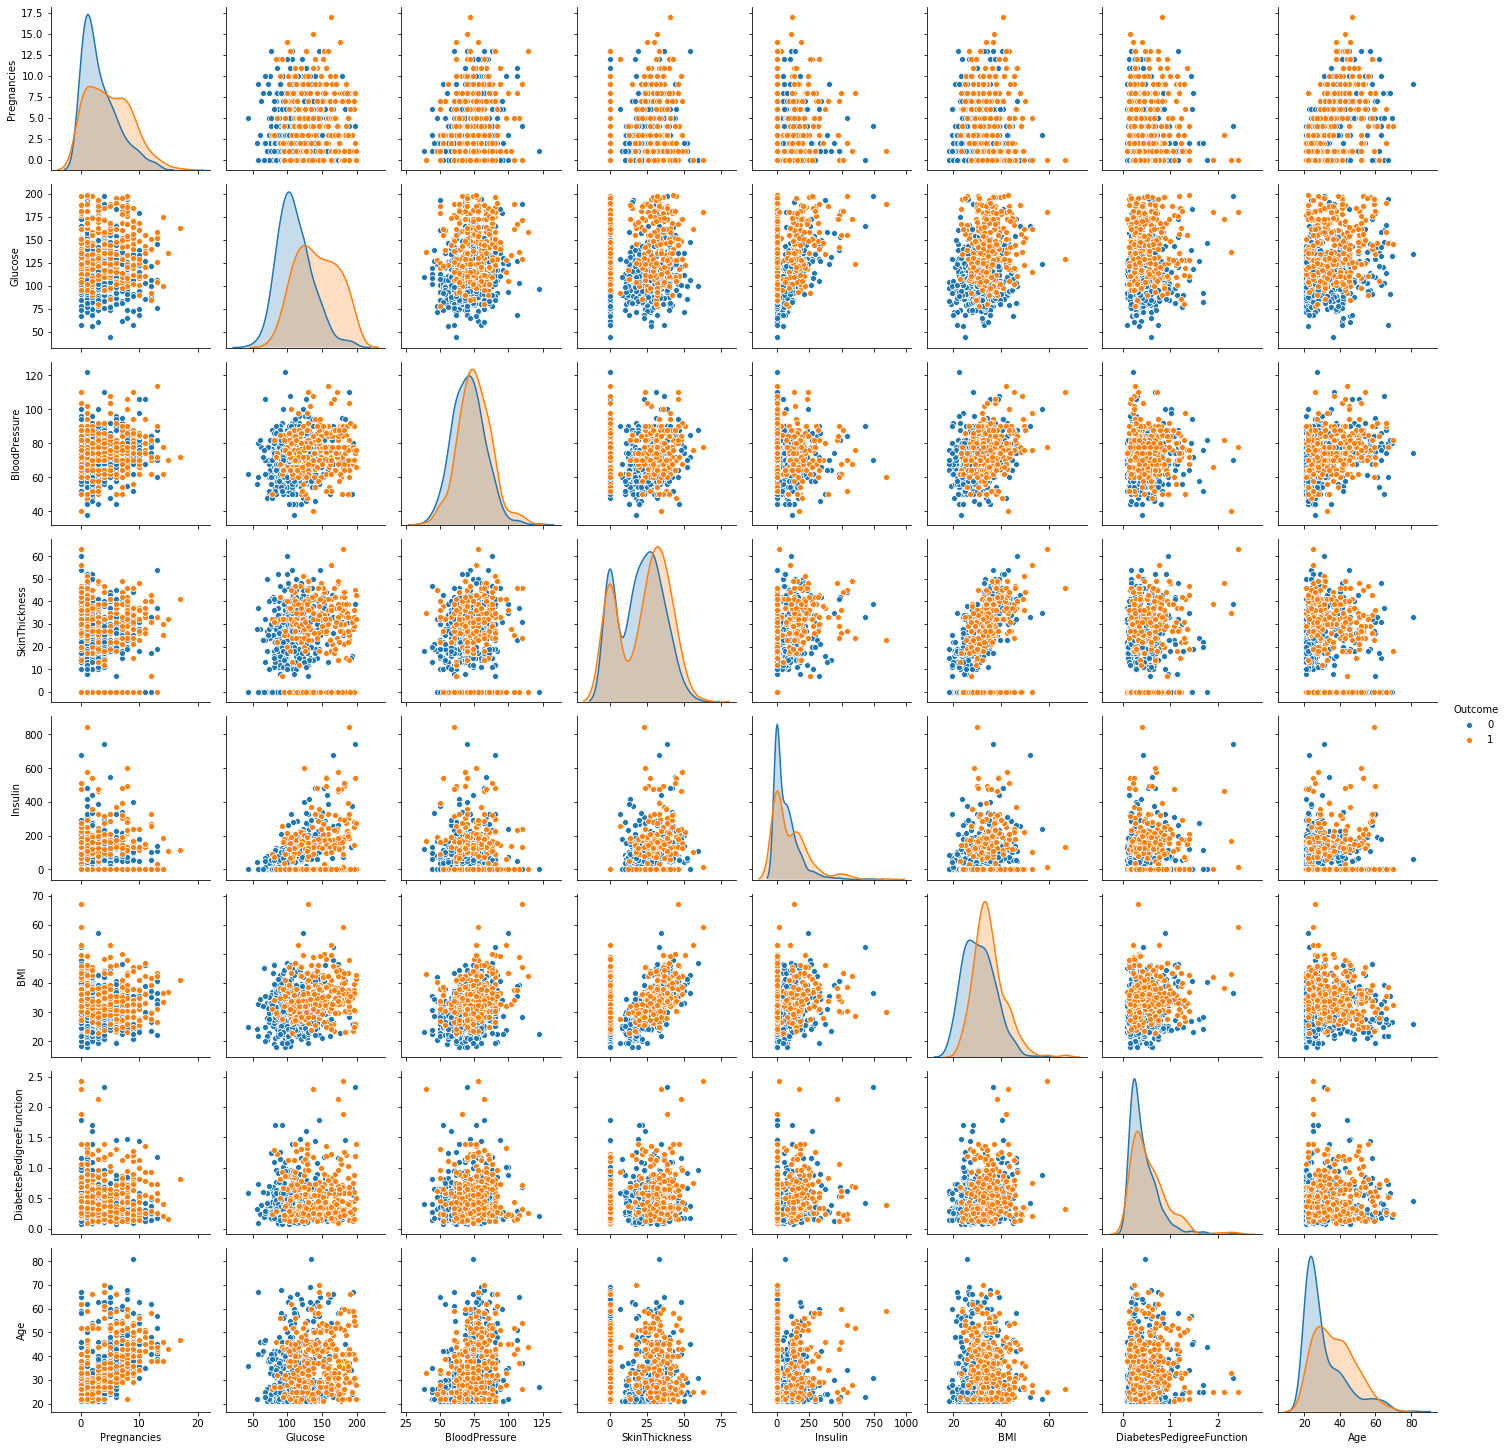

In [30]:
sns.pairplot(df, hue = "Outcome");

## Train | Test Split and Scaling

In [31]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model=LogisticRegression()

In [38]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred=log_model.predict(X_test_scaled)

In [40]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [41]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
747,1,81,74,41,57,46.300,1.096,32,0,0,0.307
700,2,122,76,27,200,35.900,0.483,26,0,0,0.260
462,8,74,70,40,49,35.300,0.705,39,0,0,0.196
220,0,177,60,29,478,34.600,1.072,21,1,1,0.698
151,4,114,65,0,0,21.900,0.432,37,0,0,0.123
176,6,85,78,0,0,31.200,0.382,42,0,0,0.117
586,8,143,66,0,0,34.900,0.129,41,1,1,0.652
630,7,114,64,0,0,27.400,0.732,34,1,0,0.322
102,0,125,96,0,0,22.500,0.262,21,0,0,0.063
598,1,173,74,0,0,36.800,0.088,38,1,1,0.683


## Model Performance on Classification Tasks

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [45]:
from sklearn.model_selection import cross_validate

In [46]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.007,0.004,0.600,0.450,0.514,0.707
2,0.005,0.004,0.643,0.450,0.529,0.724
3,0.004,0.003,0.923,0.600,0.727,0.845
4,0.004,0.003,0.857,0.600,0.706,0.828
5,0.004,0.003,0.706,0.600,0.649,0.776
6,0.004,0.003,0.647,0.550,0.595,0.741
7,0.004,0.003,0.714,0.526,0.606,0.772
8,0.004,0.003,0.647,0.579,0.611,0.754
9,0.004,0.003,0.733,0.550,0.629,0.772
10,0.004,0.004,0.625,0.500,0.556,0.719


In [47]:
df_scores.mean()[2:]

test_precision   0.710
test_recall      0.541
test_f1          0.612
test_accuracy    0.764
dtype: float64

In [48]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate for 0 class

In [49]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [50]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

In [51]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}, 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,0.007,0.005,0.744,0.842,0.790
2,0.005,0.004,0.750,0.868,0.805
3,0.005,0.003,0.822,0.974,0.892
4,0.004,0.002,0.818,0.947,0.878
5,0.003,0.002,0.805,0.868,0.835
6,0.004,0.003,0.780,0.842,0.810
7,0.004,0.002,0.791,0.895,0.840
8,0.004,0.003,0.800,0.842,0.821
9,0.004,0.003,0.786,0.892,0.835
10,0.004,0.004,0.756,0.838,0.795


In [52]:
df_scores.mean()[2:]

test_precision_0   0.785
test_recall_0      0.881
test_f1_0          0.830
dtype: float64

In [53]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## GridSearchCV

In [54]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [55]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [56]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06...
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                

In [57]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [58]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [59]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

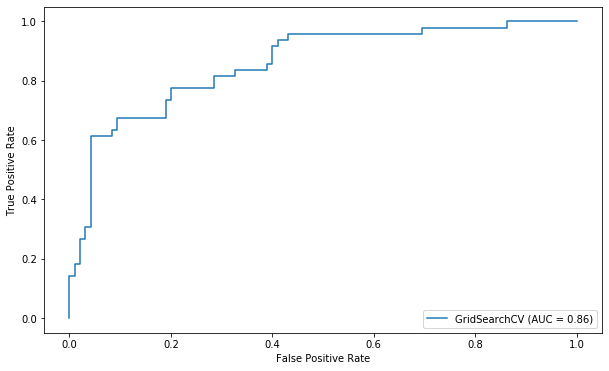

In [60]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

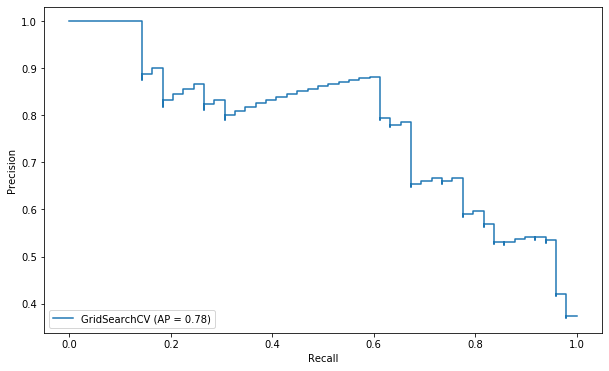

In [61]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

## Finding Best Threshold for max recall score

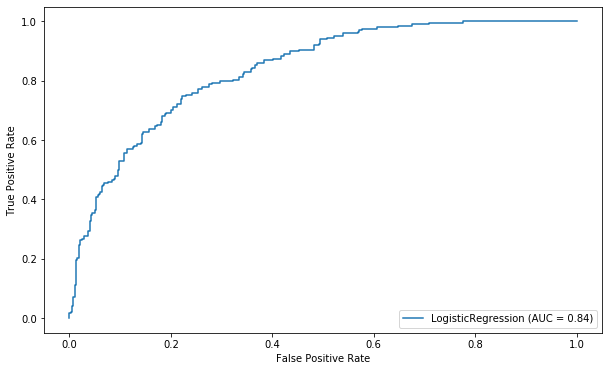

In [62]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [63]:
y_pred_proba = log_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

# yukarida grid model ile en optimal parametreleri bulmus olsak da en yuksek recall skorunu elde etmek istersek optimal
# threshold'u base model yani unbalanced model ile bulmaya calismaliyiz, bu sebeple burada grid model yerine log model 
# kullanildi
# burada f1 skoru sabit tutulurken recall artirilmak icin precision'dan feragat edilecek bir threshold degeri elde ediliyor

0.8378493934049489

In [64]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [65]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3393818488757875

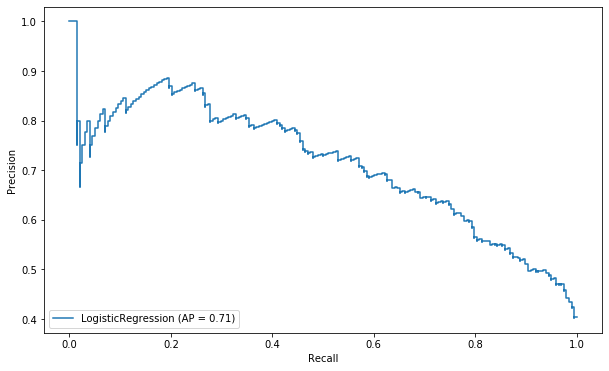

In [66]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [67]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.7120696300524079

In [68]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [69]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3393818488757875

In [70]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([0.86114295, 0.91895475, 0.54016212, 0.32834699, 0.84587361,
       0.19021483, 0.37230395, 0.89305006, 0.09179962, 0.2375818 ,
       0.42218905, 0.40049819, 0.32152214, 0.29623324, 0.91147674,
       0.04580362, 0.31484698, 0.77839007, 0.6068388 , 0.17502036,
       0.59128116, 0.07183662, 0.85620268, 0.26773187, 0.35900316,
       0.42663195, 0.21360382, 0.54007969, 0.47725356, 0.2662694 ,
       0.32224073, 0.47416859, 0.59969981, 0.29606526, 0.92993753,
       0.1640755 , 0.56706677, 0.37506   , 0.66446173, 0.17883503,
       0.22570923, 0.10909659, 0.11562538, 0.76815225, 0.45678828,
       0.48417007, 0.45125745, 0.84199523, 0.898617  , 0.4844391 ,
       0.3184771 , 0.22798042, 0.45359837, 0.06128354, 0.08594186,
       0.87896851, 0.65056099, 0.2142754 , 0.72031216, 0.53912094,
       0.81871734, 0.62134128, 0.76003772, 0.91815733, 0.84383428,
       0.17311891, 0.33797419, 0.36854904, 0.96338632, 0.10318096,
       0.50367703, 0.22026581, 0.76703259, 0.24150223, 0.65058

In [71]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [72]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[55 40]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72        95
           1       0.53      0.94      0.68        49

    accuracy                           0.70       144
   macro avg       0.74      0.76      0.70       144
weighted avg       0.81      0.70      0.71       144



In [73]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[196 182]
 [ 16 182]]
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       378
           1       0.50      0.92      0.65       198

    accuracy                           0.66       576
   macro avg       0.71      0.72      0.66       576
weighted avg       0.78      0.66      0.66       576



In [74]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [75]:
model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      64.76%  std 5.47%
Precision-1   49.86%  std 4.68%
Recall-1      91.45%  std 5.95%
F1_score-1    64.25%  std 3.31%


## Finding Best Threshold for the most balanced score between recall and precision

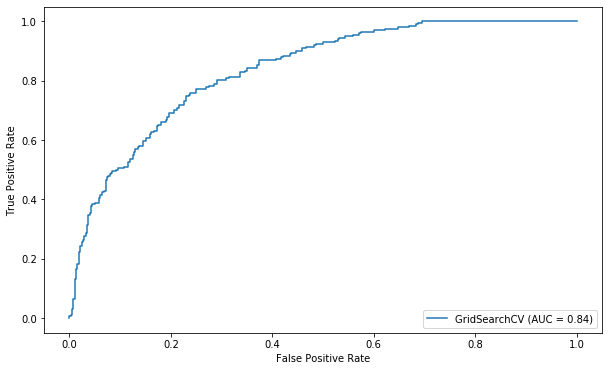

In [76]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

In [78]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

# eger hem recall acisindan hem de precision acisindan en iyi modeli bulmak istersek, threshold hesabini yaparken en iyi 
# parametreleri buldugumuz modeli yani grid modeli kullanmamiz gerekir

0.7039681099671159

In [79]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.48646661357855125

In [80]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [81]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[76 19]
 [12 37]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        95
           1       0.66      0.76      0.70        49

    accuracy                           0.78       144
   macro avg       0.76      0.78      0.77       144
weighted avg       0.79      0.78      0.79       144



In [82]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[284  94]
 [ 45 153]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       378
           1       0.62      0.77      0.69       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.75       576
weighted avg       0.78      0.76      0.76       576



In [83]:
def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [84]:
model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      73.61%  std 6.37%
Precision-1   59.76%  std 8.11%
Recall-1      75.79%  std 11.53%
F1_score-1    66.36%  std 7.60%


## Final Model and Model Deployment

In [85]:
scaler = StandardScaler().fit(X)

In [86]:
import pickle
pickle.dump(scaler, open("scaler_diabates", 'wb'))

In [87]:
X_scaled = scaler.transform(X)

In [88]:
final_model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear').fit(X_scaled, y)
# burada final modelde biz recall degerimizi en yuksek sekilde elde etmek istiyoruz

In [89]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

In [90]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,720.000,3.881,3.366,0.000,1.000,3.000,6.000,17.000
Glucose,720.000,121.897,30.649,44.000,100.000,117.000,142.000,199.000
BloodPressure,720.000,72.589,12.075,38.000,64.000,72.000,80.000,122.000
SkinThickness,720.000,21.288,15.477,0.000,0.000,24.000,33.000,63.000
Insulin,720.000,84.676,117.277,0.000,0.000,48.000,132.000,846.000
BMI,720.000,32.424,6.842,18.200,27.475,32.350,36.600,67.100
DiabetesPedigreeFunction,720.000,0.475,0.333,0.078,0.245,0.378,0.629,2.420
Age,720.000,33.339,11.737,21.000,24.000,29.000,41.000,81.000


In [91]:
my_dict = {"Pregnancies": [3, 6, 5],
           "Glucose": [117, 140, 120],
           "BloodPressure": [72, 80, 75],
           "SkinThickness": [23, 33, 25],
           "Insulin": [48, 132, 55],
           "BMI": [32, 36.5, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.45],
           "Age": [29, 40, 33]
          }

In [92]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.000,0.380,29
1,6,140,80,33,132,36.500,0.630,40
2,5,120,75,25,55,34.000,0.450,33


In [93]:
scaler_diabates = pickle.load(open("scaler_diabates", "rb"))

In [94]:
sample_scaled = scaler_diabates.transform(sample)
sample_scaled

array([[-0.26176089, -0.15989353, -0.04880222,  0.1107269 , -0.3129508 ,
        -0.06203757, -0.28511694, -0.3699221 ],
       [ 0.63004277,  0.59105285,  0.61417137,  0.75730737,  0.40380099,
         0.59612131,  0.46610236,  0.56790858],
       [ 0.33277488, -0.06194401,  0.19981287,  0.240043  , -0.25322148,
         0.23047749, -0.07477553, -0.02889276]])

In [95]:
final_model = pickle.load(open("final_model_diabates", "rb"))

In [115]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

# burada optimal threshold'umuz grid model ile elde ettigimiz threshold'a gore hesaplandi, yani recall ve precision degeri
# birlikte en yuksek olacak sekilde

In [116]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.34"] = predictions2
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.34
0,3,117,72,23,48,32.000,0.380,29,0.368,0,0
1,6,140,80,33,132,36.500,0.630,40,0.757,1,1
2,5,120,75,25,55,34.000,0.450,33,0.497,0,1
